#LIBERARY

In [105]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
import missingno as msng
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------------------------->CLASSIFIER_MODEL(KNN)
from sklearn.neighbors import KNeighborsClassifier
#---------------------------------------------------------------------------------------------->CLASSIFICATION_REPORT
from sklearn.metrics import classification_report
#---------------------------------------------------------------------------------------------->EVALUATION_CLASSIFICATION
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve,roc_auc_score
#---------------------------------------------------------------------------------------------->COUNTER
from collections import Counter #COUNTER THE VALUES INSIDE THE FEATURES
#---------------------------------------------------------------------------------------------->UNBALANCE(OVERSAMPLER_UNDERSAMPLE_SMOTE_TOMEK_LINKS_)
from imblearn.under_sampling import TomekLinks#UNBALANCE(TomekLinks)-FOR BALANCED THE DATA
from imblearn.under_sampling import RandomUnderSampler#UNBALANCE(UNDERSAMPLER)-FOR BALANCED THE DATA
from imblearn.over_sampling import RandomOverSampler#UNBALANCE(OVERSAMPLER)-FOR BALANCED THE DATA
from imblearn.over_sampling import SMOTE #UNBALANCE(SMOTE)-FOR BALANCED THE DATA

#READ_DATA

In [106]:
df=pd.read_csv('/content/titanic dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [108]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [110]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [111]:
corr = df.corr()
corr.iloc[:,0].sort_values(ascending=False)

PassengerId    1.000000
Age            0.036847
Fare           0.012658
Parch         -0.001652
Survived      -0.005007
Pclass        -0.035144
SibSp         -0.057527
Name: PassengerId, dtype: float64

#VISUALIZATION

In [112]:
px.imshow(df.corr(),title="Correlation Plot of the titanic survived")

In [113]:
fig = px.scatter(df, x="Pclass", y="Survived", color="Sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")# color is hue
fig.show()

In [114]:
fig = px.bar(df, x="Embarked", y="Survived", color="Sex", barmode="group")#color is a hue & Embarked is hue
fig.show()

In [115]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
fig = px.scatter_matrix(df, dimensions=["Pclass", "Age", "SibSp", "Parch"], color="Survived")
fig.show()

In [117]:
fig = px.ecdf(df, x="Survived", color="Sex")
fig.show()

In [118]:
fig = px.violin(df, y="Survived", x="Embarked", color="Sex", box=True, points="all", hover_data=df.columns)
fig.show()

In [119]:
fig = px.density_heatmap(df, x="Survived", y="Fare", marginal_x="rug", marginal_y="histogram")
fig.show()

#ENCODING

In [120]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex']) # if multi features
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,NaN,1,2,23.4500,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1


#EDA

In [121]:
df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
dtype: int64

In [122]:
df.dropna(inplace=True)

In [123]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

#SPLIT_DATA

In [124]:
x=df.loc[:,df.columns != 'Survived']
y=df['Survived']

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=42)

#APPLY_MODEL_W_UNBALANCE_PREPROCESSES

In [126]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

In [127]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [128]:
GRID_SEARCH_ROS= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [129]:
GRID_SEARCH_RESULT_ROS= GRID_SEARCH_ROS.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [130]:
GRID_SEARCH_RESULT_ROS.best_score_*100

74.32871476349737

In [131]:
GRID_SEARCH_RESULT_ROS.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

In [132]:
y_pred_N= GRID_SEARCH_ROS.predict(x_test)

In [133]:
print(classification_report(y_pred_N, y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        93
           1       0.57      0.64      0.60        50

    accuracy                           0.71       143
   macro avg       0.68      0.69      0.69       143
weighted avg       0.72      0.71      0.71       143



In [134]:
ROC_N=roc_auc_score(y_test, y_pred_N)*100
ROC_N

68.22660098522168

In [135]:
score_test_N=accuracy_score(y_pred_N, y_test)*100
print("Accuracy for our test dataset  : {:.2f}%".format(score_test_N))
recall_N=recall_score(y_pred_N, y_test)*100
print("Recall for our test dataset  : {:.2f}%".format(recall_N))
precesion_N=precision_score(y_pred_N, y_test)*100
print("Precesion for our test dataset  : {:.2f}%".format(precesion_N))

Accuracy for our test dataset  : 70.63%
Recall for our test dataset  : 64.00%
Precesion for our test dataset  : 57.14%


#APPLY_MODEL_UNBALANCE_PREPROCESSES(RANDOM_OVER_SAMPLE)

In [136]:
Counter(y)

Counter({0: 424, 1: 290})

In [137]:
# create oversampler object
Ros = RandomOverSampler(sampling_strategy =1,random_state=42)# THIS DEFAULT IS (SAMPLING_STRATEGY =1) OR Ros = RandomOverSampler(sampling_strategy=.6,random_state=42
# apply oversampling to the data
x_resampled_ros, y_resampled_ros = Ros.fit_resample(x, y)
# print the new class distribution
print('Resampled class distribution:', Counter(y_resampled_ros))

Resampled class distribution: Counter({0: 424, 1: 424})


In [138]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_resampled_ros,y_resampled_ros,test_size=.3 ,random_state=42)

##APPLY_MODEL

In [139]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

In [140]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [141]:
GRID_SEARCH_ROS= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [142]:
GRID_SEARCH_RESULT_ROS= GRID_SEARCH_ROS.fit(x_train_ros, y_train_ros)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [143]:
GRID_SEARCH_RESULT_ROS.best_score_*100

78.07862127902008

In [144]:
GRID_SEARCH_RESULT_ROS.best_params_

{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}

In [145]:
y_pred_ROS= GRID_SEARCH_ROS.predict(x_test_ros)

In [146]:
print(classification_report(y_test_ros, y_pred_ROS))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       127
           1       0.78      0.84      0.81       128

    accuracy                           0.80       255
   macro avg       0.80      0.80      0.80       255
weighted avg       0.80      0.80      0.80       255



In [147]:
ROC_ROS=roc_auc_score(y_test_ros, y_pred_ROS)*100
ROC_ROS

79.98585137795276

In [148]:
score_test_ros=accuracy_score(y_pred_ROS,y_test_ros)*100
print("Accuracy for our test dataset with tuning is Random_over : {:.2f}%".format(score_test_ros))
recall_ros=recall_score(y_pred_ROS,y_test_ros)*100
print("Recall for our test dataset with tuning is Random_over : {:.2f}%".format(recall_ros))
precesion_ros=precision_score(y_pred_ROS,y_test_ros)*100
print("Precesion for our test dataset with tuning is Random_over : {:.2f}%".format(precesion_ros))

Accuracy for our test dataset with tuning is Random_over : 80.00%
Recall for our test dataset with tuning is Random_over : 78.10%
Precesion for our test dataset with tuning is Random_over : 83.59%


Text(0.5, 1.0, 'SCORE_FOR_UNBALANCE_BY_RANDOM_OVER_SAMPLE')

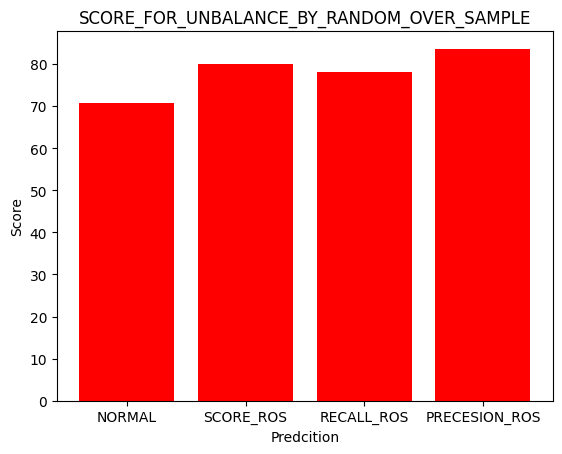

In [149]:
x= ["NORMAL","SCORE_ROS","RECALL_ROS","PRECESION_ROS",]
y=[score_test_N ,score_test_ros,recall_ros,precesion_ros]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_UNBALANCE_BY_RANDOM_OVER_SAMPLE")

#APPLY_MODEL_UNBALANCE_PREPROCESSES(SMOTE)

In [150]:
x=df.loc[:,df.columns != 'Survived']
y=df['Survived']

In [151]:
Counter(y)

Counter({0: 424, 1: 290})

In [152]:
# create SMOTE object with strategy to handle missing values
Ros_smote = SMOTE(sampling_strategy=1, k_neighbors=5)# (SAMPLING_STRATEGY=1)==(sampling_strategy='minority')FOR INCREASE THE LESS CLASSE TO REACH THE OTHER CLASSE TO MAKE IT EQUALES) / #(SAMPLING_STRATEGY=.6) FOR INCREASE THE LESS CLASSE TO REACH THE OTHER CLASSE TO INCREASE IT BY 60%)
# apply SMOTE to the data
x_resampled_ros_smote, y_resampled_ros_smote = Ros_smote.fit_resample(x, y)
# print the new class distribution
print('Resampled class distribution:', Counter(y_resampled_ros_smote))

Resampled class distribution: Counter({0: 424, 1: 424})


In [153]:
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_resampled_ros_smote,y_resampled_ros_smote,test_size=.3 ,random_state=42)

##APPLY_MODEL

In [154]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

In [155]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [156]:
GRID_SEARCH_SMOTE= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [157]:
GRID_SEARCH_RESULT_SMOTE= GRID_SEARCH_SMOTE.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [158]:
GRID_SEARCH_RESULT_SMOTE.best_score_*100

76.05042016806722

In [159]:
GRID_SEARCH_RESULT_SMOTE.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [160]:
y_pred_SMOTE= GRID_SEARCH_SMOTE.predict(x_test_smote)

In [161]:
print(classification_report(y_test_smote, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       127
           1       0.78      0.73      0.76       128

    accuracy                           0.76       255
   macro avg       0.77      0.76      0.76       255
weighted avg       0.77      0.76      0.76       255



In [162]:
ROC_SMOTE=roc_auc_score(y_test_smote, y_pred_SMOTE)*100
ROC_SMOTE

76.48252952755907

In [163]:
score_test_SMOTE=accuracy_score(y_pred_SMOTE,y_test_smote)*100
print("Accuracy for our test dataset with tuning is SMOTE : {:.2f}%".format(score_test_SMOTE))
recall_SMOTE=recall_score(y_pred_SMOTE,y_test_smote)*100
print("Recall for our test dataset with tuning is SMOTE : {:.2f}%".format(recall_SMOTE))
precesion_SMOTE=precision_score(y_pred_SMOTE,y_test_smote)*100
print("Precesion for our test dataset with tuning is SMOTE : {:.2f}%".format(precesion_SMOTE))

Accuracy for our test dataset with tuning is SMOTE : 76.47%
Recall for our test dataset with tuning is SMOTE : 78.33%
Precesion for our test dataset with tuning is SMOTE : 73.44%


Text(0.5, 1.0, 'SCORE_FOR_UNBALANCE_BY_SMOTE')

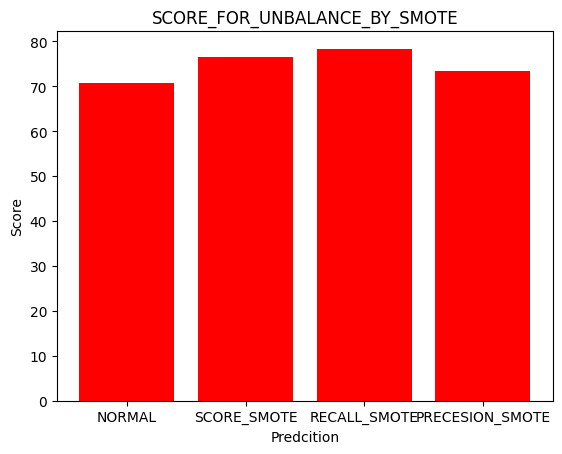

In [164]:
x= ["NORMAL","SCORE_SMOTE","RECALL_SMOTE","PRECESION_SMOTE",]
y=[score_test_N ,score_test_SMOTE,recall_SMOTE,precesion_SMOTE]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_UNBALANCE_BY_SMOTE")

#APPLY_MODEL_UNBALANCE_PREPROCESSES(UNDER_OVER_SAMPLE)

In [165]:
x=df.loc[:,df.columns != 'Survived']
y=df['Survived']

In [166]:
Counter(y)

Counter({0: 424, 1: 290})

In [167]:
# create undersampler object
Rus = RandomUnderSampler(sampling_strategy=1,random_state=42)# (SAMPLING_STRATEGY=1)==(sampling_strategy='minority')FOR INCREASE THE LESS CLASSE TO REACH THE OTHER CLASSE TO MAKE IT EQUALES) / #(SAMPLING_STRATEGY=.7) FOR INCREASE THE LESS CLASSE TO REACH THE OTHER CLASSE TO INCREASE IT BY 70%)
# apply undersampling to the data
x_resampled_rus, y_resampled_rus = Rus.fit_resample(x, y)
# print the new class distribution
print('Resampled class distribution:', Counter(y_resampled_rus))

Resampled class distribution: Counter({0: 290, 1: 290})


In [168]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_resampled_rus,y_resampled_rus,test_size=.3 ,random_state=42)

##APPLY_MODEL

In [169]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

In [170]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [171]:
GRID_SEARCH_RUS= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [172]:
GRID_SEARCH_RESULT_RUS= GRID_SEARCH_RUS.fit(x_train_rus, y_train_rus)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [173]:
GRID_SEARCH_RESULT_RUS.best_score_*100

72.6708822643782

In [174]:
GRID_SEARCH_RESULT_RUS.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

In [175]:
y_predGRID_SEARCH_RESULT_RUS= GRID_SEARCH_RUS.predict(x_test_rus)

In [176]:
print(classification_report(y_test_rus, y_predGRID_SEARCH_RESULT_RUS))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        97
           1       0.74      0.77      0.75        77

    accuracy                           0.78       174
   macro avg       0.77      0.77      0.77       174
weighted avg       0.78      0.78      0.78       174



In [177]:
ROC_RUS=roc_auc_score(y_test_rus, y_predGRID_SEARCH_RESULT_RUS)*100
ROC_RUS

77.48694604364708

In [178]:
score_test_RUS=accuracy_score(y_predGRID_SEARCH_RESULT_RUS,y_test_rus)*100
print("Accuracy for our test dataset with tuning is Random under : {:.2f}%".format(score_test_RUS))
recall_RUS=recall_score(y_predGRID_SEARCH_RESULT_RUS,y_test_rus)*100
print("Recall for our test dataset with tuning is Random under : {:.2f}%".format(recall_RUS))
precesion_RUS=precision_score(y_predGRID_SEARCH_RESULT_RUS,y_test_rus)*100
print("Precesion for our test dataset with tuning is Random under  : {:.2f}%".format(precesion_RUS))

Accuracy for our test dataset with tuning is Random under : 77.59%
Recall for our test dataset with tuning is Random under : 73.75%
Precesion for our test dataset with tuning is Random under  : 76.62%


Text(0.5, 1.0, 'SCORE_FOR_UNBALANCE_BY_RANDOM_UNDER_SAMPLED')

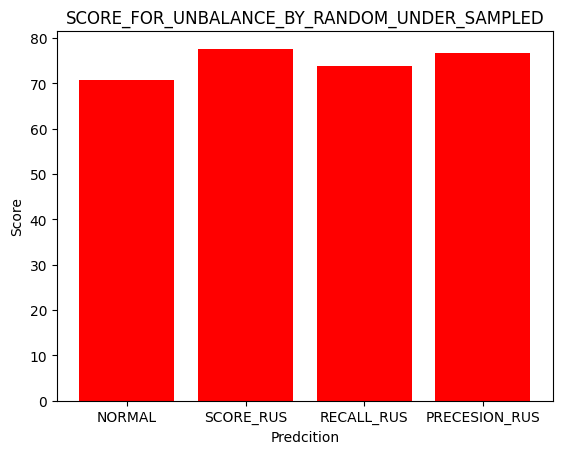

In [179]:
x= ["NORMAL","SCORE_RUS","RECALL_RUS","PRECESION_RUS"]
y=[score_test_N ,score_test_RUS,recall_RUS,precesion_RUS]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_UNBALANCE_BY_RANDOM_UNDER_SAMPLED")

#APPLY_MODEL_UNBALANCE_PREPROCESSES(TMOECK_LINKS)

In [180]:
x=df.loc[:,df.columns != 'Survived']
y=df['Survived']

In [181]:
Counter(y)

Counter({0: 424, 1: 290})

In [182]:
# create oversampler object
Rus_tomkl= TomekLinks()# DEFAULT IS (0.6)
# apply oversampling to the data
x_resampled_rus_tkl, y_resampled_rus_tkl = Rus_tomkl.fit_resample(x, y)
# print the new class distribution
print('Resampled class distribution:', Counter(y_resampled_rus_tkl))

Resampled class distribution: Counter({0: 366, 1: 290})


In [183]:
x_train_tk,x_test_tk,y_train_tk,y_test_tk=train_test_split(x_resampled_rus_tkl,y_resampled_rus_tkl,test_size=.3 ,random_state=42)

##APPLY_MODEL

In [184]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

In [185]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [186]:
GRID_SEARCH_TLK= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [187]:
GRID_SEARCH_RESULT_TLK= GRID_SEARCH_TLK.fit(x_train_tk, y_train_tk)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [188]:
GRID_SEARCH_RESULT_TLK.best_score_*100

75.81700907787864

In [189]:
GRID_SEARCH_RESULT_TLK.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [190]:
y_predGRID_SEARCH_RESULT_TKL= GRID_SEARCH_TLK.predict(x_test_tk)

In [191]:
print(classification_report(y_test_tk, y_predGRID_SEARCH_RESULT_TKL))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       119
           1       0.68      0.74      0.71        78

    accuracy                           0.76       197
   macro avg       0.75      0.76      0.75       197
weighted avg       0.77      0.76      0.76       197



In [192]:
ROC_TLK=roc_auc_score(y_test_tk, y_predGRID_SEARCH_RESULT_TKL)*100
ROC_TLK

75.83494936436114

In [193]:
score_test_TKL=accuracy_score(y_predGRID_SEARCH_RESULT_TKL,y_test_tk)*100
print("Accuracy for our test dataset with tuning is SMOTE : {:.2f}%".format(score_test_TKL))
recall_TKL=recall_score(y_predGRID_SEARCH_RESULT_TKL,y_test_tk)*100
print("Recall for our test dataset with tuning is SMOTE : {:.2f}%".format(recall_TKL))
precesion_TKL=precision_score(y_predGRID_SEARCH_RESULT_TKL,y_test_tk)*100
print("Precesion for our test dataset with tuning is SMOTE : {:.2f}%".format(precesion_TKL))

Accuracy for our test dataset with tuning is SMOTE : 76.14%
Recall for our test dataset with tuning is SMOTE : 68.24%
Precesion for our test dataset with tuning is SMOTE : 74.36%


Text(0.5, 1.0, 'SCORE_FOR_UNBALANCE_BY_RANDOM_UNDER_SAMPLED(TOMECK_LINKS)')

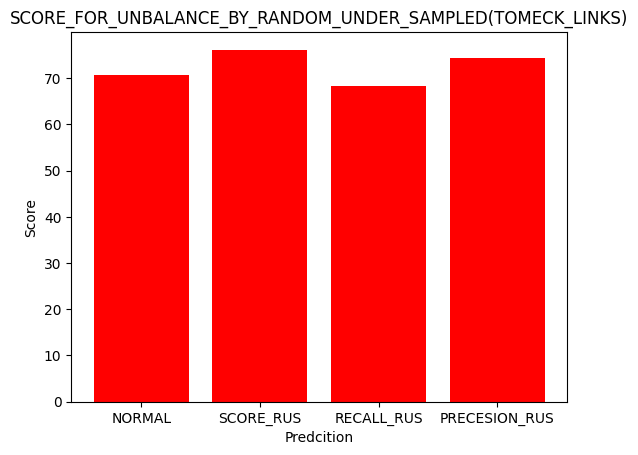

In [194]:
x= ["NORMAL","SCORE_RUS","RECALL_RUS","PRECESION_RUS"]
y=[score_test_N ,score_test_TKL,recall_TKL,precesion_TKL]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_UNBALANCE_BY_RANDOM_UNDER_SAMPLED(TOMECK_LINKS)")

#ROC_CURVE_FOR_UNBALANCE_PRE_PROSECCES

Text(0.5, 1.0, 'SCORE_FOR_UNBALANCE_BY_ALL_UNBALANCE_PROCESS')

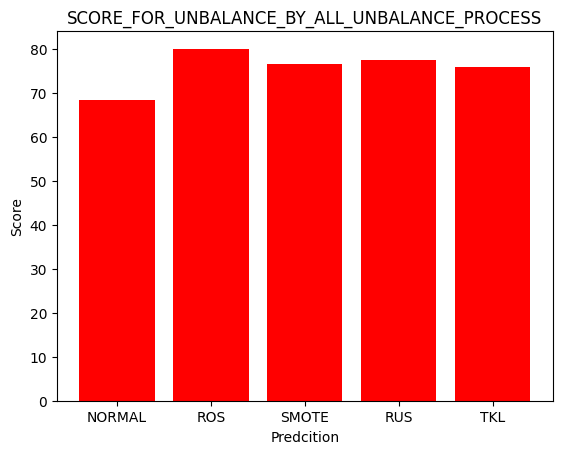

In [195]:
x= ["NORMAL","ROS","SMOTE","RUS","TKL"]
y=[ROC_N ,ROC_ROS,ROC_SMOTE,ROC_RUS,ROC_TLK]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_UNBALANCE_BY_ALL_UNBALANCE_PROCESS")

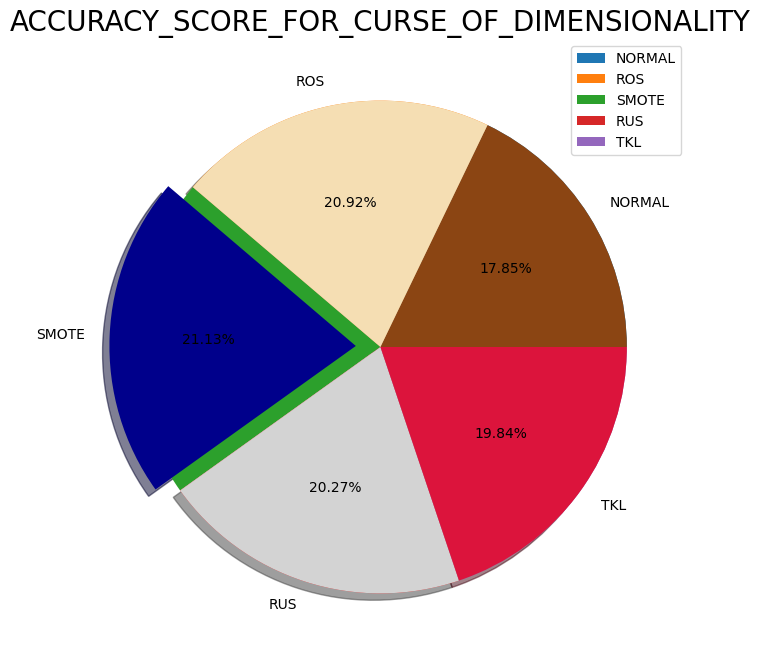

In [196]:
X= ["NORMAL","ROS","SMOTE","RUS","TKL"]
DATA=[68.22660098522168,79.98585137795276,80.7609498031496,77.48694604364708,75.83494936436114]
colors = ['saddlebrown', 'wheat', 'darkblue', 'lightgrey','crimson']
EXPLOD = [0.0, 0.0, 0.1, 0.0,0.0]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("ACCURACY_SCORE_FOR_CURSE_OF_DIMENSIONALITY", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()

#ACCURACY_SCORE_FOR_UNBALANCE_PRE_PROSCECCES

Text(0.5, 1.0, 'ACCURACY_FOR_UNBALANCE_BY_ALL_UNBALANCE_PROCESS')

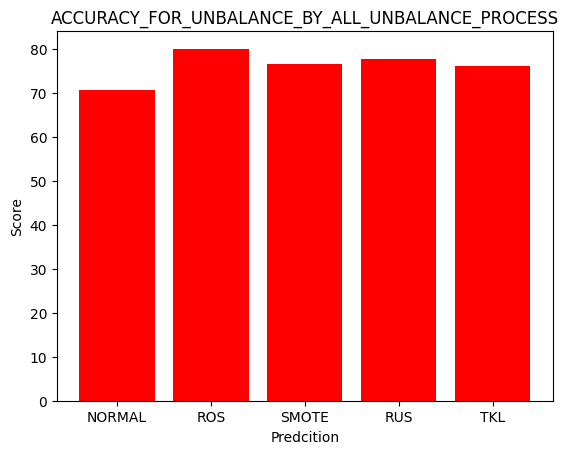

In [197]:
x= ["NORMAL","ROS","SMOTE","RUS","TKL"]
y=[score_test_N ,score_test_ros,score_test_SMOTE,score_test_RUS,score_test_TKL]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("ACCURACY_FOR_UNBALANCE_BY_ALL_UNBALANCE_PROCESS")

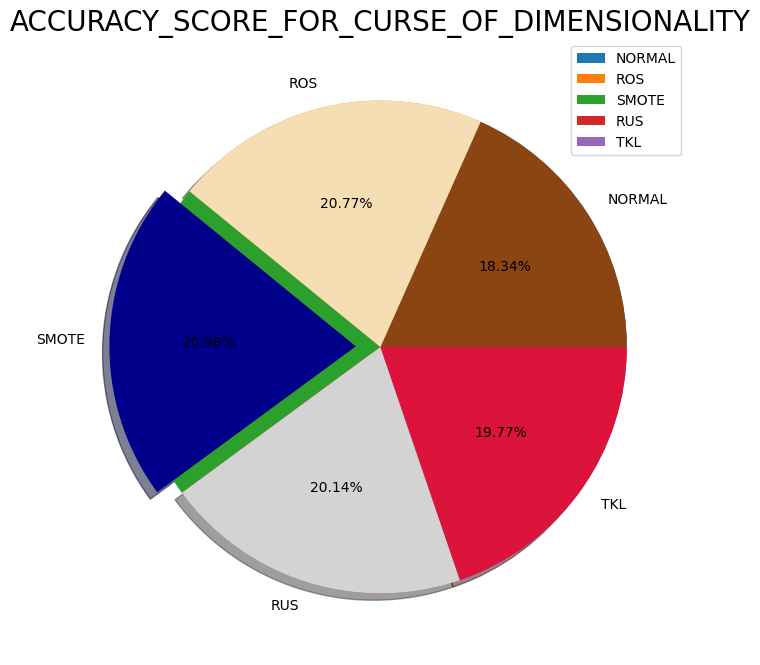

In [198]:
X= ["NORMAL","ROS","SMOTE","RUS","TKL"]
DATA=[70.62937062937063,80.0,80.7843137254902,77.58620689655173,76.14213197969542]
colors = ['saddlebrown', 'wheat', 'darkblue', 'lightgrey','crimson']
EXPLOD = [0.0, 0.0, 0.1, 0.0,0.0]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("ACCURACY_SCORE_FOR_CURSE_OF_DIMENSIONALITY", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()